# 3. Computer Hardware (1.5 điểm)

Cho dữ liệu machine.data.txt

Yêu cầu: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán thích hợp để thực hiện việc dự đoán giá trị ERP (estimated relative performance), là cột cuối cùng (cột 9) trong dataframe dựa trên các thông tin được cung cấp (loại bỏ các cột dữ liệu nếu không cần thiết)

### Tiền xử lý dữ liệu

In [1]:
# thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression as lr
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('machine.data.txt',names=['vendor','model','myct','mmin','mmax','cach','chmin','chmax','prp','erp']) # dữ liệu kaggle
if df.isna().any().any(): # Kiểm tra dữ liệu Null
    print('Có dữ liệu Null.')
else:
    print('Không có dữ liệu Null.')

Không có dữ liệu Null.


In [3]:
print('Dữ liệu có {} dòng, {} cột.'.format(df.shape[0],df.shape[1]))

Dữ liệu có 209 dòng, 10 cột.


In [4]:
df.head()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [5]:
df.tail()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47
208,wang,vs-90,480,1000,4000,0,0,0,45,25


In [6]:
print('Thông tin dữ liệu.')
df.info()

Thông tin dữ liệu.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
vendor    209 non-null object
model     209 non-null object
myct      209 non-null int64
mmin      209 non-null int64
mmax      209 non-null int64
cach      209 non-null int64
chmin     209 non-null int64
chmax     209 non-null int64
prp       209 non-null int64
erp       209 non-null int64
dtypes: int64(8), object(2)
memory usage: 14.8+ KB


In [7]:
print('Mô tả dữ liệu.')
df.describe()

Mô tả dữ liệu.


,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


**Chọn dữ liệu liên quan:** Chọn input X là các cột *từ vendor đến prp*, và output y là cột *erp*. Dữ liệu *vendor* và *model* cần được chuyển từ dạng chuỗi sang dạng số.

In [8]:
X = df.drop('erp',axis=1).replace(pd.unique(df.model),[i for i in range(pd.unique(df.model).shape[0])]).replace(pd.unique(df.vendor),[i for i in range(pd.unique(df.vendor).shape[0])])
y = df.erp
X.head()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp
0,0,0,125,256,6000,256,16,128,198
1,1,1,29,8000,32000,32,8,32,269
2,1,2,29,8000,32000,32,8,32,220
3,1,3,29,8000,32000,32,8,32,172
4,1,4,29,8000,16000,32,8,16,132


In [9]:
y.head()

0    199
1    253
2    253
3    253
4    132
Name: erp, dtype: int64

### 1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đã đọc và chuẩn hóa, với tỷ lệ dữ liệu test là 0.3

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Áp dụng thuật toán thích hợp để xây dựng model. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp?

### và 4. Trực quan hóa kết quả (nếu có). Đưa ra một số nhận xét dựa trên kết quả.

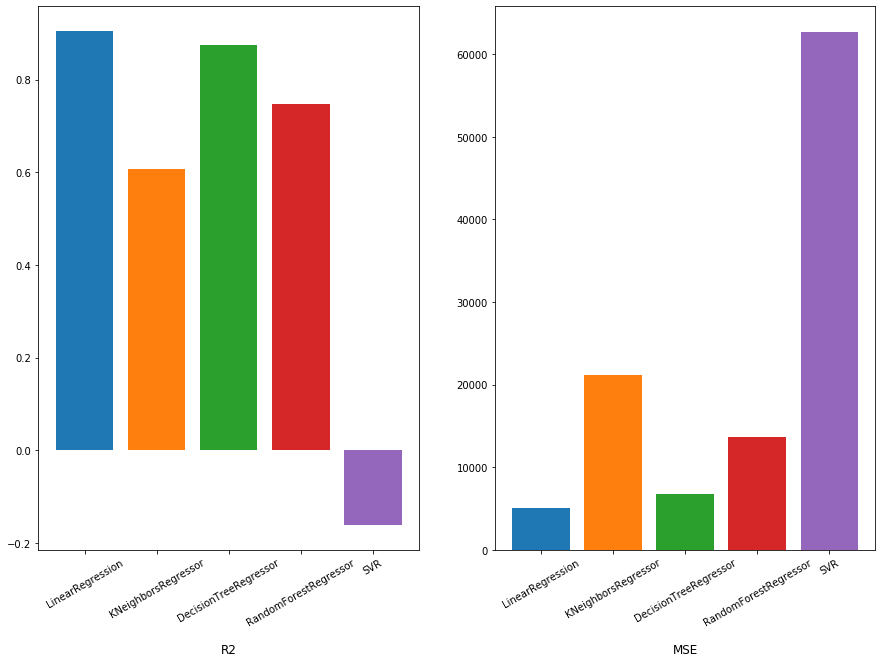

Model LinearRegression có R2 score cao nhất = 90.46%.
Model LinearRegression có MSE thấp nhất = 5140.38.


In [11]:
models = [lr(),knn(),dt(),rf(n_estimators=10),SVR(gamma='auto')]
r2 = 0
mse = 0
best_r2 = ''
least_mse = ''
labels = []
fig, ax = plt.subplots(1,2,figsize=(15,10))
for m in models:
    model = m.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rr = r2_score(y_test,y_pred)
    e = mean_squared_error(y_test,y_pred)
    modname = m.__class__.__name__
    labels += [modname]
    ax[0].bar(modname,rr)
    ax[1].bar(modname,e)
    if rr > r2:
        r2 = rr
        best_r2 = modname
    if (mse == 0) or (e < mse):
        mse = e
        least_mse = modname
for i in [0,1]:
    plt.sca(ax[i])
    plt.xticks(rotation=30)
    plt.title(['R2','MSE'][i],y=-0.2)
plt.show()
print('Model {} có R2 score cao nhất = {:.2%}.'.format(best_r2,r2))
print('Model {} có MSE thấp nhất = {:.2f}.'.format(least_mse,mse))

Kết quả trên cho thấy Linear Regression là model phù hợp nhất cho bài toán.

### 3. Đánh giá model dựa trên train/test.

In [12]:
reg = lr()
reg.fit(X_train,y_train)
print('Train score = {:.2%}\nTest score = {:.2%}'.format(reg.score(X_train,y_train),reg.score(X_test,y_test)))

Train score = 95.66%
Test score = 90.46%


**Nhận xét:** Model không bị overfitting vì Train score và Test score chỉ chênh lệch ít.

### 5. Với X_new như sau thì ERP lần lượt là bao nhiêu?

In [13]:
# X_new = [['amdahl','470v/7b',29,8000,32000,32,8,32,172], ['sperry','1100/83',50,2000,32000,112,52,104,307]]
X_new = [[np.where(pd.unique(df.vendor) == 'amdahl')[0],np.where(pd.unique(df.model) == '470v/7b')[0],29,8000,32000,32,8,32,172],
         [np.where(pd.unique(df.vendor) == 'sperry')[0],np.where(pd.unique(df.model) == '1100/83')[0],50,2000,32000,112,52,104,307]]

In [14]:
y_new = reg.predict(X_new)
print('Với X_new như trên thì ERP lần lượt là {:.2f} và {:.2f}.'.format(y_new[0],y_new[1]))

Với X_new như trên thì ERP lần lượt là 247.14 và 314.40.
